In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
from pandas.core.tools.datetimes import to_datetime
test_df = pd.DataFrame([

   ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'],
    [2850,3900,4400,4400,4900,4900,4900,5300,5600,5800,6500,7800,8800,10200],
    ],
    index=['ds','y'])
test_df = test_df.T
test_df['ds'] = pd.to_datetime(test_df['ds'])
test_df['y'] = test_df['y'].astype(float)
test_df.info()
test_df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      14 non-null     datetime64[ns]
 1   y       14 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 352.0 bytes


,ds,y
0,2010-01-01,2850.0
1,2011-01-01,3900.0
2,2012-01-01,4400.0
3,2013-01-01,4400.0
4,2014-01-01,4900.0
5,2015-01-01,4900.0
6,2016-01-01,4900.0
7,2017-01-01,5300.0
8,2018-01-01,5600.0
9,2019-01-01,5800.0


In [4]:
# m = Prophet(interval_width =0.95, daily_seasonality= False)
m = Prophet()
model = m.fit(test_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7e4ymab/3o9i8qjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7e4ymab/iokdz_wv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54967', 'data', 'file=/tmp/tmp_7e4ymab/3o9i8qjt.json', 'init=/tmp/tmp_7e4ymab/iokdz_wv.json', 'output', 'file=/tmp/tmp_7e4ymab/prophet_modelrecbn6a0/prophet_model-20240123021025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [5]:
future = m.make_future_dataframe(periods=10, freq="Y")
forecast = m. predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-3080.165400,2001.490856,3805.768027,-3080.165400,-3080.165400,5964.934500,5964.934500,5964.934500,5964.934500,5964.934500,5964.934500,0.0,0.0,0.0,2884.769100
1,2011-01-01,-2637.251507,2424.212874,4146.889073,-2637.251507,-2637.251507,5957.710579,5957.710579,5957.710579,5957.710579,5957.710579,5957.710579,0.0,0.0,0.0,3320.459072
2,2012-01-01,-2194.337594,2774.158131,4581.698009,-2194.337594,-2194.337594,5881.046123,5881.046123,5881.046123,5881.046123,5881.046123,5881.046123,0.0,0.0,0.0,3686.708529
3,2013-01-01,-1750.210224,3246.507193,5087.111308,-1750.210224,-1750.210224,5902.715419,5902.715419,5902.715419,5902.715419,5902.715419,5902.715419,0.0,0.0,0.0,4152.505195
4,2014-01-01,-1307.296298,3767.250652,5604.674195,-1307.296298,-1307.296298,5964.934500,5964.934500,5964.934500,5964.934500,5964.934500,5964.934500,0.0,0.0,0.0,4657.638202
5,2015-01-01,-864.382357,4252.540792,6023.277081,-864.382357,-864.382357,5957.710579,5957.710579,5957.710579,5957.710579,5957.710579,5957.710579,0.0,0.0,0.0,5093.328222
6,2016-01-01,-421.465464,4569.151393,6386.265722,-421.465464,-421.465464,5881.046123,5881.046123,5881.046123,5881.046123,5881.046123,5881.046123,0.0,0.0,0.0,5459.580659
7,2017-01-01,22.664949,5064.773466,6802.879168,22.664949,22.664949,5902.715419,5902.715419,5902.715419,5902.715419,5902.715419,5902.715419,0.0,0.0,0.0,5925.380367
8,2018-01-01,465.586220,5611.633091,7322.661930,465.586220,465.586220,5964.934500,5964.934500,5964.934500,5964.934500,5964.934500,5964.934500,0.0,0.0,0.0,6430.520720
9,2019-01-01,908.545420,5981.215233,7810.793461,908.545420,908.545420,5957.710579,5957.710579,5957.710579,5957.710579,5957.710579,5957.710579,0.0,0.0,0.0,6866.255999


In [6]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19,2028-12-31,5340.564786,10191.875130,12012.782824,5340.503438,5340.621529,5735.063824,5735.063824,5735.063824,5735.063824,5735.063824,5735.063824,0.0,0.0,0.0,11075.628610
20,2029-12-31,5783.524005,10429.794217,12207.148879,5783.446879,5783.594426,5520.006398,5520.006398,5520.006398,5520.006398,5520.006398,5520.006398,0.0,0.0,0.0,11303.530404
21,2030-12-31,6226.483225,10578.823137,12364.847628,6226.389667,6226.572262,5236.236187,5236.236187,5236.236187,5236.236187,5236.236187,5236.236187,0.0,0.0,0.0,11462.719412
22,2031-12-31,6669.442444,10661.421966,12497.174816,6669.331269,6669.547606,4884.234552,4884.234552,4884.234552,4884.234552,4884.234552,4884.234552,0.0,0.0,0.0,11553.676996
23,2032-12-31,7113.615249,11971.367197,13730.024171,7113.485083,7113.739402,5735.063824,5735.063824,5735.063824,5735.063824,5735.063824,5735.063824,0.0,0.0,0.0,12848.679073


In [7]:
# final_df = forecast [['ds','yhat','yhat_lower','yhat_upper']].iloc[14:23]
final_df = forecast [['ds','yhat','yhat_lower','yhat_upper']]
final_df.columns = ["Year", "Predicted Price", "Predicted Price(Lower)", "Predicted Price(Upper)"]
final_df = final_df.astype({"Predicted Price":"int","Predicted Price(Lower)":"int","Predicted Price(Upper)":"int" })
final_df

,Year,Predicted Price,Predicted Price(Lower),Predicted Price(Upper)
0,2010-01-01,2884,2001,3805
1,2011-01-01,3320,2424,4146
2,2012-01-01,3686,2774,4581
3,2013-01-01,4152,3246,5087
4,2014-01-01,4657,3767,5604
5,2015-01-01,5093,4252,6023
6,2016-01-01,5459,4569,6386
7,2017-01-01,5925,5064,6802
8,2018-01-01,6430,5611,7322
9,2019-01-01,6866,5981,7810


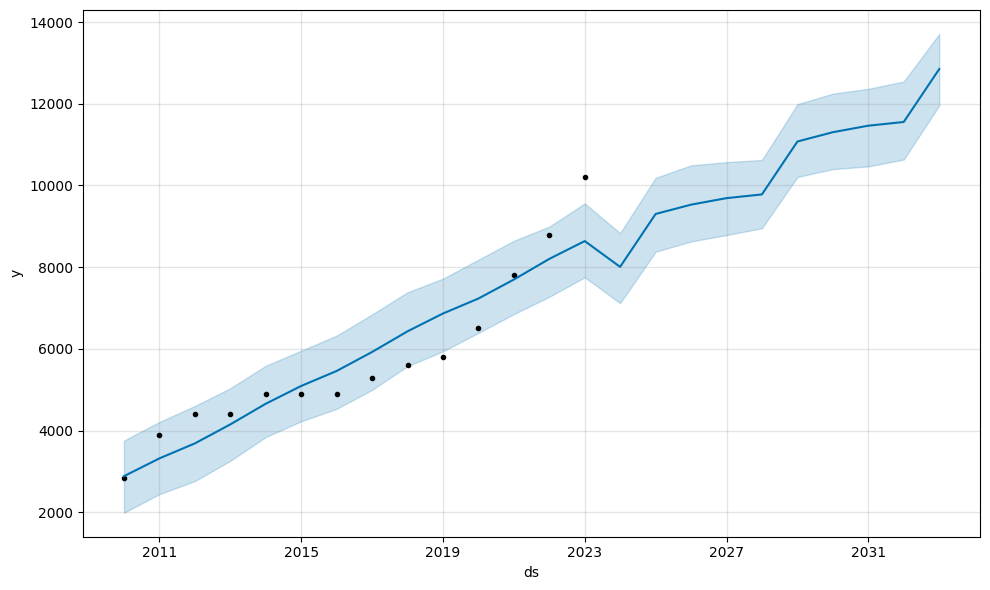

In [ ]:
plot1 = m.plot(forecast),